# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
path = './traffic-signs-data/'
training_file = path + 'train.p'
validation_file = path + 'valid.p'
testing_file = path + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of a traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate([y_train, y_valid, y_test])))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

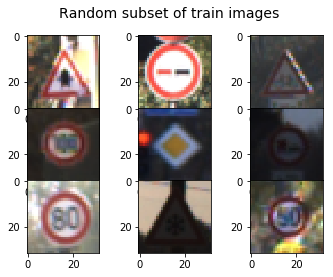

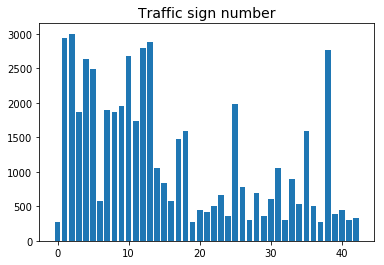

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

num_img = 9
num_rows, num_cols = 3, 3
idx = np.random.randint(X_train.shape[0], size=num_img)
images = X_train[idx]
images = images.reshape(3, 3, *images.shape[1:])
fig, axes = plt.subplots(num_rows, num_cols)
for i in range(num_rows):
    for j in range(num_cols):
        axes[i, j].imshow(images[i,j])
        plt.subplots_adjust(wspace=0, hspace=0)
fig.suptitle('Random subset of train images', fontsize=14)
plt.savefig('subset_train_images.png')
plt.show()

unique_values, unique_count = np.unique(np.concatenate([y_train,
                                        y_valid, y_test]),
                                        return_counts=True)
plt.bar(unique_values, unique_count)
plt.title('Traffic sign number', fontsize=14)
plt.savefig('traffic_sign_number.png')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
import tensorflow as tf
from scipy.signal.signaltools import convolve2d
from scipy.signal.windows import gaussian
from scipy import ndimage

# create helper functions to preprocess data as explained in 
# http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

# create_kernel and lcn copied from here:
# https://github.com/ejhumphrey/dl4mir/blob/master/dl4mir/common/lcn.py
def create_kernel(dim0, dim1):
    """Create a two-dimensional LPF kernel, with a half-Hamming window along
    the first dimension and a Gaussian along the second.
    Parameters
    ----------
    dim0 : int
        Half-Hamming window length.
    dim1 : int
        Gaussian window length.
    Returns
    -------
    kernel : np.ndarray
        The 2d LPF kernel.
    """
    dim0_weights = np.hamming(dim0 * 2 + 1)[:dim0]
    dim1_weights = gaussian(dim1, dim1 * 0.25, True)
    kernel = dim0_weights[:, np.newaxis] * dim1_weights[np.newaxis, :]
    return kernel / kernel.sum()

def create_gaussian_kernel(dim0, dim1):
    """Create a two-dimensional LPF kernel, with a half-Hamming window along
    the first dimension and a Gaussian along the second.
    Parameters
    ----------
    dim0 : int
        Half-Hamming window length.
    dim1 : int
        Gaussian window length.
    Returns
    -------
    kernel : np.ndarray
        The 2d LPF kernel.
    """
    dim0_weights = gaussian(dim0, dim0 * 0.25, True)
    dim1_weights = gaussian(dim1, dim1 * 0.25, True)
    kernel = dim0_weights[:, np.newaxis] * dim1_weights[np.newaxis, :]
    return kernel / kernel.sum()

def lcn(X, kernel):
    """Apply Local Contrast Normalization (LCN) to an array.
    Parameters
    ----------
    X : np.ndarray, ndim=2
        Input representation.
    kernel : np.ndarray
        Convolution kernel (should be roughly low-pass).
    Returns
    -------
    Z : np.ndarray
        The processed output.
    """
    if X.ndim != 2:
        raise ValueError("Input must be a 2D matrix.")
    Xh = convolve2d(X, kernel, mode='same', boundary='symm')
    V = X - Xh
    S = np.sqrt(convolve2d(np.power(V, 2.0),
                kernel, mode='same', boundary='symm'))
    S2 = np.zeros(S.shape) + S.mean()
    S2[S > S.mean()] = S[S > S.mean()]
    if S2.sum() == 0.0:
        S2 += 1.0
    return V / S2

def glob_norm_channel(channel):
    num = channel-channel.mean()
    adjusted_stddev = max(channel.std(), 1/np.sqrt(channel.size))
    return num / adjusted_stddev

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def yuv(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

def one_hot(labels, n_classes):
    return np.eye(n_classes)[labels]

def hist_eq(channel, method='global'):
    """Apply histogram equalization method to a channel.
    Parameters
    ----------
    channel : np.ndarray, ndim=2
        Input representation.
    method : string
        Name of the method. 'global' or 'adaptative'
    Returns
    -------
    Z : np.ndarray
        The contrast adapted channel.
    """
    assert method.lower() in ('global', 'adaptative'), """
    Valid methods are "global", "adaptative"
    """
    if method == 'global':
        return cv2.equalizeHist(channel)
    else:
        return clahe(channel)

def clahe(channel, clipLimit=4.0, tileGridSize=(2,2)):
    """Apply contrast limited adaptive histogram equalization to a channel.
    Parameters
    ----------
    channel : np.ndarray, ndim=2
        Input representation.
    clipLimit : float
        Limit for contrast clipping.
    tileGridSize : 2-tuple
        Size of the kernel.
    Returns
    -------
    Z : np.ndarray
        The contrast adapted channel.
    """
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    return clahe.apply(channel)
    
def apply_augment(img, label):
    distorted = []
    rotated = ndimage.rotate(img, np.random.randint(-15,15),
                             reshape=False, mode='nearest')
    
    zoomed = clipped_zoom(img, np.random.uniform(0.9, 1.1))
    
    rot_zoomed = ndimage.rotate(img, np.random.randint(-15,15),
                             reshape=False, mode='nearest')
    rot_zoomed = clipped_zoom(rot_zoomed, np.random.uniform(0.9, 1.1))
    
    distorted.append(rotated)
    distorted.append(zoomed)
    distorted.append(rot_zoomed)
        
    return np.array(distorted), np.array([label,label,label])

def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # width and height of the zoomed image
    zh = int(np.round(zoom_factor * h))
    zw = int(np.round(zoom_factor * w))

    # for multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # zooming out
    if zoom_factor < 1:
        # bounding box of the clip region within the output array
        top = (h - zh) // 2
        left = (w - zw) // 2
        # zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = ndimage.zoom(img, zoom_tuple, **kwargs)

    # zooming in
    elif zoom_factor > 1:
        # bounding box of the clip region within the input array
        top = (zh - h) // 2
        left = (zw - w) // 2
        out = ndimage.zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # if zoom_factor == 1, just return the input array
    else:
        out = img
    return out

def get_batches(x, y, batch_size):
    assert len(x) == len(y), 'Features and labels vectors do not match in size'
    num_batches = len(x)//batch_size
    if(len(x)%batch_size != 0):
        num_batches += 1
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        yield x[start:end], y[start:end]

def augment_data(features, labels, min_threshold=1000):
    assert len(features) == len(labels),\
        'Features and labels vectors do not match in size'
    unq_val, unq_cnt = np.unique(labels, return_counts=True)
    feature_count = dict(zip(unq_val, unq_cnt))
    labels_augment = set(unq_val[unq_cnt < min_threshold])
    zipped = zip(features, labels)
    new_features = np.copy(features)
    new_labels = np.copy(labels)
    for feat, label in zipped:
        if label in labels_augment and feature_count[label] < min_threshold:
            dist_feat, dist_lab = apply_augment(feat, label)
            new_features = np.concatenate((new_features, dist_feat))
            new_labels = np.concatenate((new_labels, dist_lab))
            feature_count[label] += len(dist_lab)
            
    return new_features, new_labels

In [5]:
new_feat, new_labels = augment_data(X_train, y_train)

/home/hugh/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


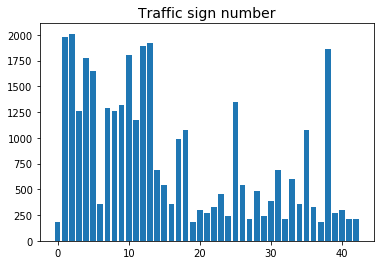

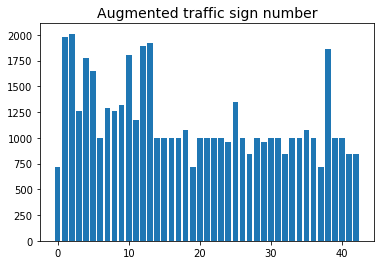

In [6]:
unq_val, unq_cnt = np.unique(y_train, return_counts=True)
plt.bar(unq_val, unq_cnt)
plt.title('Traffic sign number', fontsize=14)
plt.show()
unique_values_1, unique_count_1 = np.unique(new_labels, return_counts=True)
plt.bar(unique_values_1, unique_count_1)
plt.title('Augmented traffic sign number', fontsize=14)
plt.savefig('augmented_traffic_sign_number.png')
plt.show()


In [7]:
# preprocess data
def preprocess(x, y, color_space='yuv', hist_method='global'):
    
    assert color_space.lower() in ('rgb', 'gray', 'yuv'), """
    Valid color spaces are "rgb", "gray" and "yuv"
    """
    assert hist_method.lower() in ('global', 'adaptative'), """
    Valid methods are "global", "adaptative"
    """
    
    if color_space == 'gray':
        images_tran = np.array([grayscale(img) for img in x])
        images_tran = np.expand_dims(images_tran, -1)
    else:
        # transform to yuv to apply clahe, if colorspace was set to rgb
        # switch back to rgb after applying clahe
        images_tran = np.array([yuv(img) for img in x])
#         images_tran = np.array([np.dstack((hist_eq(img[..., 0], hist_method),
#                                   img[..., 1], img[..., 2]))
#                       for img in images_tran])
        if color_space == 'rgb':
            images_tran = np.array([cv2.cvtColor(img, cv2.COLOR_YUV2RGB) 
                           for img in images_tran])

    num_channels = images_tran.shape[-1]
    # apply global contrast normalization
    if num_channels == 1:
        images_norm = np.array([glob_norm_channel(img)
                            for img in images_tran])
    elif color_space == 'rgb':
        images_norm = (images_tran - images_tran.min()) \
        / (images_tran.max() - images_tran.min())
    else:
        images_norm = np.array([np.dstack((glob_norm_channel(img[..., 0]),
                                           glob_norm_channel(img[..., 1]),
                                           glob_norm_channel(img[..., 2])))
                                for img in images_tran])

    # apply local contrast normalization only on the first layer
    kernel = create_kernel(3,3)
    if num_channels == 1:
        X_pre = np.array([np.expand_dims(lcn(img[..., 0], kernel), -1)
                          for img in images_norm])
    elif color_space == 'rgb':
        X_pre = images_norm
    else:
        X_pre = np.array([np.dstack(
            (lcn(img[...,0], kernel), img[...,1], img[...,2]))
                          for img in images_norm])

    y_pre = one_hot(y, n_classes)
    return X_pre, y_pre

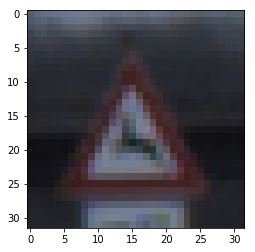

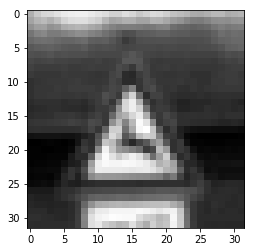

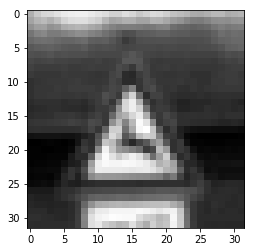

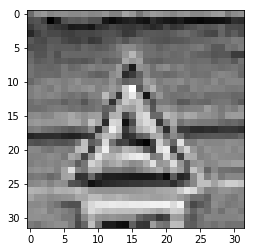

/home/hugh/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


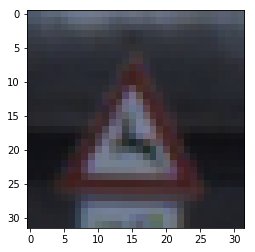

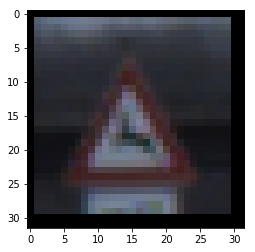

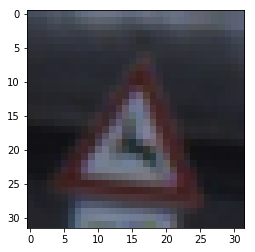

In [8]:
plt.imshow(new_feat[420])
plt.savefig('original_image.png')
plt.show()
yuv_img = yuv(new_feat[420])[...,0]
plt.imshow(yuv_img, cmap='gray')
plt.savefig('yuv_image.png')
plt.show()
global_img = glob_norm_channel(yuv_img)
plt.imshow(global_img, cmap='gray')
plt.savefig('global_contrast_image.png')
plt.show()
local_img = lcn(global_img, create_kernel(3,3))
plt.imshow(local_img, cmap='gray')
plt.savefig('local_contrast_image.png')
plt.show()
augmented_img, _ = apply_augment(new_feat[420], 0)
plt.imshow(augmented_img[0], cmap='gray')
plt.savefig('rotated.png')
plt.show()
plt.imshow(augmented_img[1], cmap='gray')
plt.savefig('zoomed.png')
plt.show()
plt.imshow(augmented_img[2], cmap='gray')
plt.savefig('rotated_zoomed.png')
plt.show()

In [9]:
X_train_pre, y_train_pre = preprocess(new_feat, new_labels, 'yuv', 'adaptative')
X_val_pre, y_val_pre = preprocess(X_valid, y_valid, 'yuv', 'adaptative')
X_test_pre, y_test_pre = preprocess(X_test, y_test, 'yuv', 'adaptative')

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
    
def sermanet(x, batch_norm=False, training=False):

    # first layer has 100 feature maps connected to Y channel
    # and 8 feature maps connected to U and V channels

    with tf.name_scope('conv1'):
        if x.get_shape().as_list()[-1] == 3:
            x_y = tf.expand_dims(x[:,:,:,0], -1)
            x_uv = x[:,:,:,1:]
        
            y_conv = tf.layers.conv2d(x_y, 108, 5, 1, 'same',
                                      activation=tf.nn.relu)
            uv_conv = tf.layers.conv2d(x_uv, 8, 5, 1, 'same',
                                       activation=tf.nn.relu)
            conv1 = tf.concat([y_conv, uv_conv], axis=3)
        else:
            conv1 = tf.layers.conv2d(x, 108, 5, 1, 'same',
                                     activation=tf.nn.relu)
        if batch_norm:
            conv1 = tf.layers.batch_normalization(conv1, training=training)

        conv1 = tf.layers.max_pooling2d(conv1, 5, 2, padding='same')

    with tf.name_scope('conv1_branch'):
        conv1_branch = tf.layers.max_pooling2d(conv1, 5, 2, padding='same')

    with tf.name_scope('conv2'):
        conv2 = tf.layers.conv2d(conv1, 108, 5, 1, 'same',
                                 activation=tf.nn.relu)
        if batch_norm:
            conv2 = tf.layers.batch_normalization(conv2, training=training)
        conv2 = tf.layers.max_pooling2d(conv2, 5, 2, padding='same')

    conv1_flat_dims = np.prod(conv1_branch.get_shape().as_list()[1:])
    conv2_flat_dims = np.prod(conv2.get_shape().as_list()[1:])
    conv1_branch_flatten = tf.reshape(conv1_branch, (-1, conv1_flat_dims))
    conv2_flatten = tf.reshape(conv2, (-1, conv2_flat_dims))

    fc_input = tf.concat([conv1_branch_flatten, conv2_flatten], axis=1)

    fc1 = tf.layers.dense(fc_input, 100, activation=tf.nn.relu)
    
    logits = tf.layers.dense(fc1, 43)
    return logits

In [11]:
### Defined another architecture for trials
    
def idsia(x, training=False):

    with tf.name_scope('conv1'):
        # 32x32x3
        conv1 = tf.layers.conv2d(x, 100, 7, 1, 'same',
                                     activation=tf.nn.relu)
        conv1 = tf.layers.batch_normalization(conv1, training=training)
        conv1 = tf.layers.max_pooling2d(conv1, 5, 2, padding='same')
        # 16x16x100

    with tf.name_scope('conv1_branch'):
        # 16x16x100
        conv1_branch = tf.layers.max_pooling2d(conv1, 8, 8, padding='same')
        # 2x2x100

    with tf.name_scope('conv2'):
        # 16x16x100
        conv2 = tf.layers.conv2d(conv1, 150, 5, 1, 'same',
                                 activation=tf.nn.relu)
        conv2 = tf.layers.batch_normalization(conv2, training=training)
        conv2 = tf.layers.max_pooling2d(conv2, 5, 2, padding='same')
        # 8x8x150
        
    with tf.name_scope('conv2_branch'):
        # 8x8x150
        conv2_branch = tf.layers.max_pooling2d(conv2, 4, 4, padding='same')
        # 2x2x150
        
    with tf.name_scope('conv3'):
        # 8x8x150
        conv3 = tf.layers.conv2d(conv2, 250, 5, 1, 'same',
                                 activation=tf.nn.relu)
        conv3 = tf.layers.batch_normalization(conv2, training=training)
        conv3 = tf.layers.max_pooling2d(conv2, 5, 2, padding='same')
        # 4x4x250
        
    with tf.name_scope('conv3_branch'):
        # 4x4x250
        conv3_branch = tf.layers.max_pooling2d(conv3, 2, 2, padding='same')
        # 2x2x150

    conv1_flat_dims = np.prod(conv1_branch.get_shape().as_list()[1:])
    conv2_flat_dims = np.prod(conv2_branch.get_shape().as_list()[1:])
    conv3_flat_dims = np.prod(conv3_branch.get_shape().as_list()[1:])
    conv1_branch_flatten = tf.reshape(conv1_branch, (-1, conv1_flat_dims))
    conv2_branch_flatten = tf.reshape(conv2_branch, (-1, conv2_flat_dims))
    conv3_branch_flatten = tf.reshape(conv3_branch, (-1, conv3_flat_dims))

    fc_input = tf.concat([conv1_branch_flatten, conv2_branch_flatten,
                         conv3_branch_flatten], axis=1)

    fc1 = tf.layers.dense(fc_input, 300, activation=tf.nn.relu)
    
    logits = tf.layers.dense(fc1, 43)
    return logits

In [12]:
import os

tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
y = tf.placeholder(tf.float32, (None, 43), name='y')
training = tf.placeholder(tf.bool, name='training')

learning_rate = 2e-5 #0.00002
epochs = 200
batch_size = 512

logits = sermanet(x, batch_norm=True, training=training)
logits = tf.identity(logits, name='logits')
#logits = idsia(x, training=training)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                              labels=y))
with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
        
prediction = tf.argmax(logits, 1)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

save_model_path = './model/model'
if not os.path.isdir('./model'):
        os.mkdir('./model')

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [49]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        for batch_features, batch_labels in get_batches(X_train_pre,
                                                        y_train_pre, batch_size):
            sess.run(optimizer, feed_dict = {x: batch_features, y: batch_labels,
                                            training: True})
            
        training_loss = sess.run(cost, feed_dict = {x: batch_features,
                                                    y: batch_labels, training: False})
        acc = sess.run(accuracy, feed_dict = {x: X_val_pre[:-500],
                                                    y: y_val_pre[:-500], training: False})

        print('Epoch {:>2}'.format(epoch + 1), 
              'Training loss {:>2}.'.format(training_loss),
              'Accuracy {:>2}'.format(acc)
             )

    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Epoch  1 Training loss 3.934483766555786. Accuracy 0.016368286684155464
Epoch  2 Training loss 3.9145665168762207. Accuracy 0.02301790378987789
Epoch  3 Training loss 3.88896107673645. Accuracy 0.01406649686396122
Epoch  4 Training loss 3.8404881954193115. Accuracy 0.013554987497627735
Epoch  5 Training loss 3.6607160568237305. Accuracy 0.04526854306459427
Epoch  6 Training loss 3.4568564891815186. Accuracy 0.03427110239863396
Epoch  7 Training loss 3.4245829582214355. Accuracy 0.05115089565515518
Epoch  8 Training loss 2.9813599586486816. Accuracy 0.039897702634334564
Epoch  9 Training loss 2.986832857131958. Accuracy 0.05984655022621155
Epoch 10 Training loss 2.702388286590576. Accuracy 0.062148336321115494
Epoch 11 Training loss 2.4849750995635986. Accuracy 0.11253197491168976
Epoch 12 Training loss 2.1320574283599854. Accuracy 0.09974424540996552
Epoch 13 Training loss 1.8037469387054443. Accuracy 0.15831202268600464
Epoch 14 Training loss 1.4886163473129272. Accuracy 0.15652173757

Epoch 114 Training loss 0.00036522329901345074. Accuracy 0.8800511360168457
Epoch 115 Training loss 0.00034745605080388486. Accuracy 0.883375883102417
Epoch 116 Training loss 0.0003391974314581603. Accuracy 0.8874679803848267
Epoch 117 Training loss 0.0003254238690715283. Accuracy 0.8897697925567627
Epoch 118 Training loss 0.00032031963928602636. Accuracy 0.8930945992469788
Epoch 119 Training loss 0.00029854904278181493. Accuracy 0.8999999761581421
Epoch 120 Training loss 0.00028938704053871334. Accuracy 0.9043477773666382
Epoch 121 Training loss 0.00028174681938253343. Accuracy 0.9104859232902527
Epoch 122 Training loss 0.00026732642436400056. Accuracy 0.9135549664497375
Epoch 123 Training loss 0.00026285299099981785. Accuracy 0.9166240096092224
Epoch 124 Training loss 0.00025815452681854367. Accuracy 0.9181585907936096
Epoch 125 Training loss 0.0002450569299980998. Accuracy 0.9204603433609009
Epoch 126 Training loss 0.00023797343601472676. Accuracy 0.9240409135818481
Epoch 127 Traini

In [13]:
test_pred_labels = []
loaded_graph = tf.Graph()

with tf.Session(graph=loaded_graph) as sess:
    
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)
    
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    loaded_y = loaded_graph.get_tensor_by_name('y:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    loaded_training = loaded_graph.get_tensor_by_name('training:0')
    
    test_batch_acc_total = 0
    test_batch_count = 0
    
    prediction = tf.argmax(loaded_logits, 1)
    
    for batch_features, batch_labels in get_batches(X_test_pre,
                                                    y_test_pre, batch_size):
        test_batch_acc_total += sess.run(loaded_acc, feed_dict = {loaded_x: batch_features,
                                                    loaded_y: batch_labels,
                                                    loaded_training: False})
        
        test_pred_labels.extend(sess.run(prediction, feed_dict = {loaded_x: batch_features,
                                                    loaded_y: batch_labels,
                                                    loaded_training: False}))
        test_batch_count += 1
        
    print('Test Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))
        
test_pred_labels = np.array(test_pred_labels)

INFO:tensorflow:Restoring parameters from ./model/model
Test Accuracy: 0.9278568172454834



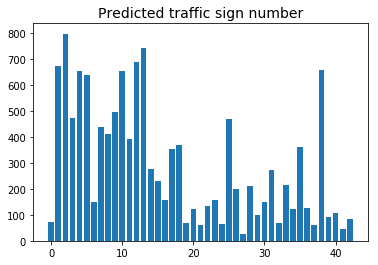

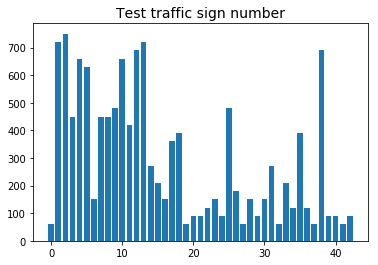

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.83      0.98      0.90        60
                              Speed limit (30km/h)       0.99      0.92      0.95       720
                              Speed limit (50km/h)       0.93      0.99      0.96       750
                              Speed limit (60km/h)       0.87      0.91      0.89       450
                              Speed limit (70km/h)       0.97      0.96      0.96       660
                              Speed limit (80km/h)       0.89      0.90      0.90       630
                       End of speed limit (80km/h)       0.91      0.91      0.91       150
                             Speed limit (100km/h)       0.92      0.89      0.90       450
                             Speed limit (120km/h)       0.96      0.88      0.92       450
                                        No passing       0.94      0.96      0.

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import pandas as pd

label_names_df = pd.read_csv('signnames.csv')

unique_values_2, unique_count_2 = np.unique(test_pred_labels, return_counts=True)
plt.bar(unique_values_2, unique_count_2)
plt.title('Predicted traffic sign number', fontsize=14)
plt.show()

unique_values_3, unique_count_3 = np.unique(y_test, return_counts=True)
plt.bar(unique_values_3, unique_count_3)
plt.title('Test traffic sign number', fontsize=14)
plt.show()

print(classification_report(y_test, test_pred_labels,
                            target_names = label_names_df['SignName']))
# uncomment the line below to visualize confusion matrix
# print(confusion_matrix(y_valid, val_pred_labels))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

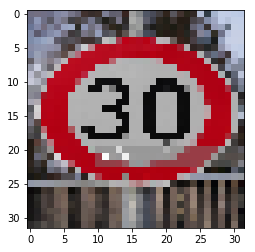

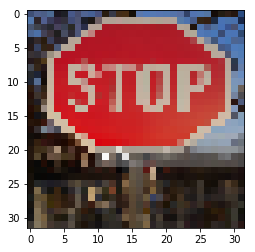

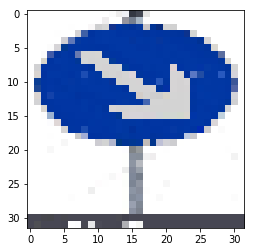

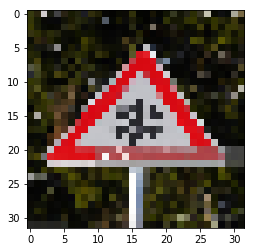

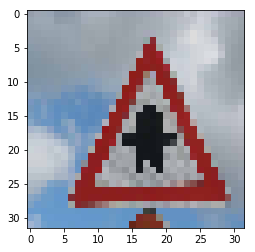

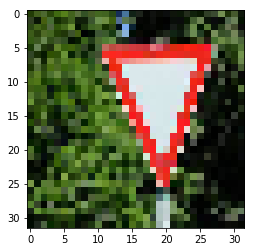

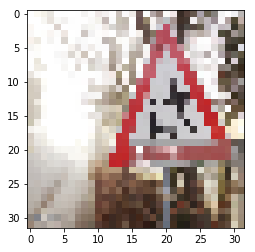

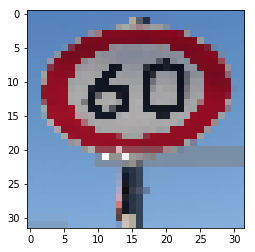

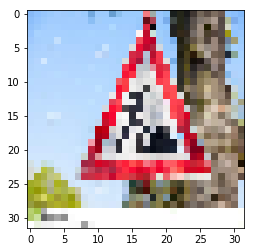

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from scipy.misc import imresize

new_images = []
for image_name in os.listdir("new-images/"):
    image = cv2.imread('new-images/'+image_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(32,32))
    plt.imshow(image)
    plt.show()
    new_images.append(image)
    
new_images = np.array(new_images)
new_labels = np.array([1, 14, 30, 11, 13, 28, 38, 3, 25])
x_new_pre, y_new_pre = preprocess(new_images, new_labels, 'yuv', 'adaptative')

### Predict the Sign Type for Each Image

In [25]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

new_pred_labels = []
loaded_graph = tf.Graph()

acc_total = 0

with tf.Session(graph=loaded_graph) as sess:
    
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)
    
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    loaded_y = loaded_graph.get_tensor_by_name('y:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    loaded_training = loaded_graph.get_tensor_by_name('training:0')
    
    prediction = tf.argmax(loaded_logits, 1)
    sofmax_logits = tf.nn.softmax(loaded_logits)
    
    top_k_preds = sess.run(tf.nn.top_k(sofmax_logits, k=5), feed_dict = {
                                                loaded_x: x_new_pre,
                                                loaded_y: y_new_pre,
                                                loaded_training: False})
    
    acc_total += sess.run(loaded_acc, feed_dict = {loaded_x: x_new_pre,
                                                loaded_y: y_new_pre,
                                                loaded_training: False})

    new_pred_labels.extend(sess.run(prediction, feed_dict = {loaded_x: x_new_pre,
                                                loaded_y: y_new_pre,
                                                loaded_training: False}))
        
new_pred_labels = np.array(new_pred_labels)

INFO:tensorflow:Restoring parameters from ./model/model


### Analyze Performance

In [26]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print('New images Accuracy: {}\n'.format(acc_total))
print(classification_report(new_labels, new_pred_labels))

New images Accuracy: 0.4444444477558136

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         1
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         1
         11       0.00      0.00      0.00         1
         13       0.00      0.00      0.00         1
         14       1.00      1.00      1.00         1
         23       0.00      0.00      0.00         0
         25       0.50      1.00      0.67         1
         28       0.00      0.00      0.00         1
         30       1.00      1.00      1.00         1
         38       0.00      0.00      0.00         1

avg / total       0.39      0.44      0.41         9



/home/hugh/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/hugh/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print('Real labels:', new_labels)
print('Predicted labels:', new_pred_labels)
print(top_k_preds)

Real labels: [ 1 14 30 11 13 28 38  3 25]
Predicted labels: [ 1 14 30 23 11 13 25  2 25]
TopKV2(values=array([[  9.55183506e-01,   1.27502959e-02,   9.42573510e-03,
          4.62467736e-03,   3.82644054e-03],
       [  9.17015851e-01,   2.23080441e-02,   1.30103296e-02,
          8.50442518e-03,   8.05105269e-03],
       [  5.20407915e-01,   1.70540527e-01,   6.61423430e-02,
          5.36480919e-02,   5.33219539e-02],
       [  3.18977743e-01,   2.79296637e-01,   1.04843400e-01,
          9.20330510e-02,   5.01844250e-02],
       [  8.84413958e-01,   1.01707816e-01,   8.88516195e-03,
          2.54121725e-03,   8.22929665e-04],
       [  9.16472673e-01,   3.41202468e-02,   1.20667089e-02,
          8.29593837e-03,   7.82080088e-03],
       [  4.86737758e-01,   1.78782403e-01,   7.04699531e-02,
          5.70155978e-02,   5.11464849e-02],
       [  7.13898063e-01,   1.91479772e-01,   3.89020406e-02,
          1.80370826e-02,   1.61614344e-02],
       [  3.43240082e-01,   2.08351195e-0

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [19]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 , plt_num=1, n_featuremaps=-1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={loaded_x : image_input, loaded_training : False})
    if n_featuremaps == -1:
        featuremaps = activation.shape[3]
    else:
        featuremaps = min(n_featuremaps, activation.shape[3])
    num_rows = np.ceil(np.sqrt(featuremaps))
    num_cols = num_rows
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        #plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.subplot(num_rows, num_cols, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

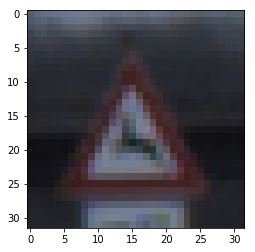

INFO:tensorflow:Restoring parameters from ./model/model


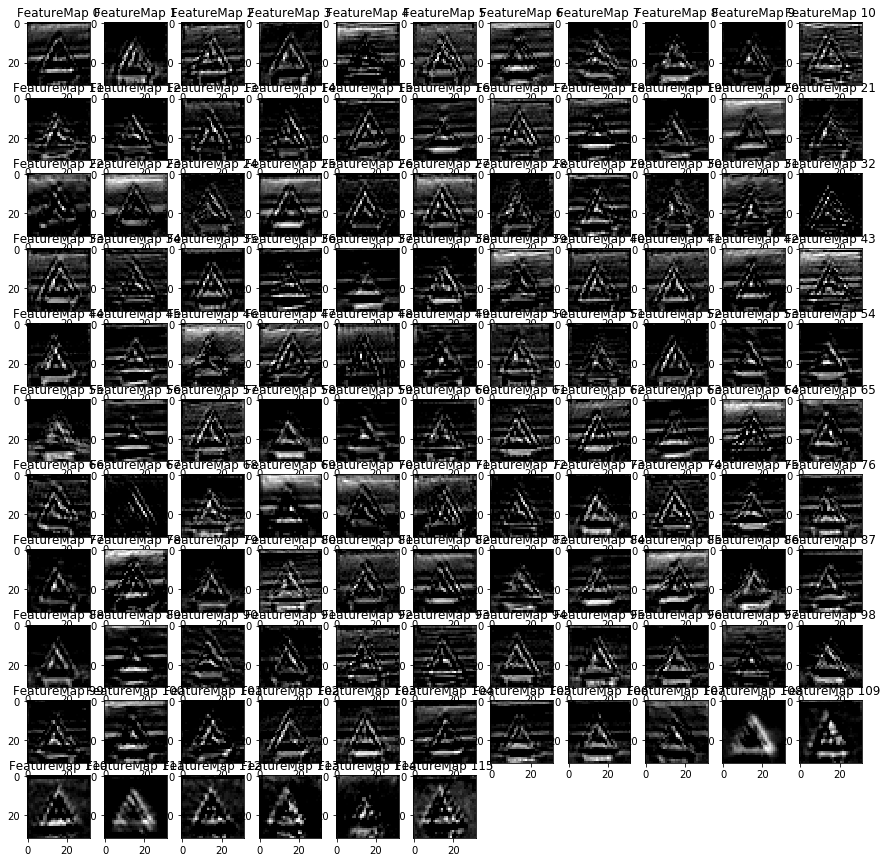

In [20]:
viz_img = [X_train_pre[420]]
viz_label = [y_train_pre[420]]
plt.imshow(X_train[420])
plt.show()

loaded_graph = tf.Graph()

with tf.Session(graph=loaded_graph) as sess:
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)
    
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    loaded_y = loaded_graph.get_tensor_by_name('y:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    loaded_training = loaded_graph.get_tensor_by_name('training:0')
    loaded_conv1 = loaded_graph.get_tensor_by_name('conv1/concat:0')
    
    #print(tf.get_default_graph().as_graph_def())
    #"conv1/concat"
    
    outputFeatureMap(viz_img, loaded_conv1)
    plt.savefig('cnn_filters.png')